## 课程论文

 请务必交到exer8文件夹下，**谢绝交到master下**
+ 请不要改动任何文件，拜托
+ 请于12月30日前先在github上提交
+ 请在元旦后提交纸质版，将本页面文件先打印为pdf格式，再去打印店付印
+ 请将论文模板和本页面文件一起装订，前者放上面，本页面文件放下面
+ 纸质版提交时间和地点请留意微信群通知

请写一下姓名和学号：
+ 姓名  ：张凡
+ 学号  ：0165194

### 样本均值分布的统计试验

+ 请将CEPS.csv数据读入python
+ 请从中随机抽取1000个数据
+ 请根据问卷从数据中挑选两个连续型变量（likert量表可以近似看作连续变量）
+ 计算这两个连续变量的均值
+ 重复随机抽取—计算均值这个过程30次，得到两个变量30个样本均值
+ 绘制这30个样本均值的直方图
+ 计算均值的均值和标准误

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

+ 请将CEPS.csv数据读入python

In [2]:
#导入数据
sentinels = {'a13': [' '], 'a14': [' ']}
df = pd.read_csv('CEPS.csv',encoding='gb2312', na_values=sentinels)

D:\files\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (20,22,23,25,28,29,39,49,74,124,125,126,127,128,129,130,131,138,140,141,147,160,161,162,165,170,174,175,176,177,179,180,181,182,183,184,188,191,194,195,196,199,221,222,223,224,251,252,254,289,290,294,295,296) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


+ 请从中随机抽取1000个数据
+ 请根据问卷从数据中挑选两个连续型变量（likert量表可以近似看作连续变量）
+ 计算这两个连续变量的均值

In [3]:
df1=df.sample(n=1000)   #随机抽取1000个样本数据

#选取 A13：目前的身高   A14：目前的体重 两个变量
mean_height1=df1['a13'].mean()
mean_weight1=df1['a14'].mean()
print('本组目前身高均值为：%.2f厘米'%mean_height1)
print('本组目前体重均值为：%.2f斤'%mean_weight1)

本组目前身高均值为：161.59厘米
本组目前体重均值为：100.29斤


+ 重复随机抽取—计算均值这个过程30次，得到两个变量30个样本均值

In [4]:
count=0
mean_height={}
mean_weight={}

while count<30:
    df_a=df.sample(n=1000)    #随机抽取样本
    mean_height_a=df_a['a13'].mean()     #计算均值 ，并将均值添加进字典
    mean_height[count+1]=mean_height_a
        
    mean_weight_a=df_a['a14'].mean()    
    mean_weight[count+1]=mean_weight_a
    
    count=count+1
print('目前的身高：\n')    
print(mean_height)
print('\n目前的体重：\n')
print(mean_weight)

    

目前的身高：

{1: 161.60887512899896, 2: 161.75025693730728, 3: 161.47835051546392, 4: 161.48136645962734, 5: 161.5770423991727, 6: 162.09474768280123, 7: 161.73319544984489, 8: 161.39148494288682, 9: 161.58333333333334, 10: 161.57512953367876, 11: 161.9007238883144, 12: 161.98867147270855, 13: 161.7006172839506, 14: 161.65173116089613, 15: 161.85077720207255, 16: 161.34397528321318, 17: 161.42105263157896, 18: 161.0421377183967, 19: 161.987525987526, 20: 161.35706914344686, 21: 161.2996878251821, 22: 161.53476482617586, 23: 161.50672182006204, 24: 161.0112704918033, 25: 161.38343558282207, 26: 161.75541795665634, 27: 161.77385892116183, 28: 161.61243523316062, 29: 161.26440329218107, 30: 161.87318087318087}

目前的体重：

{1: 98.29122055674519, 2: 100.2849344978166, 3: 99.19623059866963, 4: 98.88499452354874, 5: 99.27886710239652, 6: 100.52895322939867, 7: 99.36681222707423, 8: 99.57344940152339, 9: 98.37024972855592, 10: 99.1529933481153, 11: 98.58096280087527, 12: 100.03683640303359, 13: 100.17

+ 绘制这30个样本均值的直方图

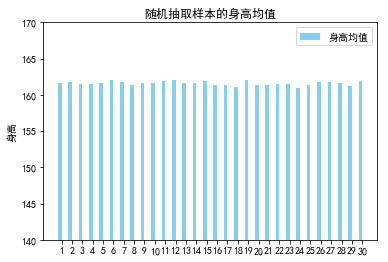

In [5]:
ind = np.arange(len(mean_height.values()))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, mean_height.values(), width, 
                color='SkyBlue', label='身高均值')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('身高')
ax.set_title('随机抽取样本的身高均值')
ax.set_xticks(ind)
ax.set_xticklabels(mean_height.keys())
ax.legend()
ax.set_ylim(140,170)

def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
                '{}'.format(height), ha=ha[xpos], va='bottom')



plt.show()

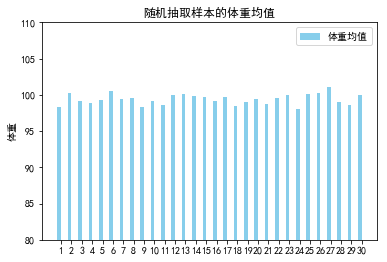

In [6]:
ind = np.arange(len(mean_weight.values()))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, mean_weight.values(), width, 
                color='SkyBlue', label='体重均值')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('体重')
ax.set_title('随机抽取样本的体重均值')
ax.set_xticks(ind)
ax.set_xticklabels(mean_weight.keys())
ax.legend()
ax.set_ylim(80,110)

def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
                '{}'.format(height), ha=ha[xpos], va='bottom')



plt.show()

+ 计算均值的均值和标准误

In [7]:
#将样本均值转为列表形式
height=[]
for i in mean_height.values():
    height.append(i)
    
weight=[]
for i in mean_weight.values():
    weight.append(i)
    
average={'height':height,
         'weight':weight,
        }
frame = pd.DataFrame(average,index=mean_height.keys())

#计算30个样本均值的均值和标准误
print('身高和体重的样本均值的均值如下：\n')
print(frame.mean())
print('\n身高和体重的标准误如下：\n')
print(frame.std())

身高和体重的样本均值的均值如下：

height    161.584441
weight     99.407814
dtype: float64

身高和体重的标准误如下：

height    0.264268
weight    0.738231
dtype: float64


### 回归分析

+ 请从CEPS.csv数据里挑选若干变量建立回归方程，要求至少三个自变量
    + 如，学生的学业成绩受认知水平、家庭收入的影响
    + 考虑因变量和自变量间的实质关系，变量间关系应该是有意义
    + 选择自变量时，注意变量的类型，如果是分类变量，需要进行编码

+ 请报告回归方程的结果，需要包括：
    + 模型拟合指标
    + 模型的显著性检验结果
    + 变量的系数
    + 各系数的显著性检验结果
    + 对模型结果的解释

+ 步骤如下：
+ 取 数学对我的未来有帮助 做因变量y
+ 取 “目前是否觉得数学学起来吃力” 、“数学老师经常提问我”、“ 数学老师经常表扬我”做自变量x0、x1、x2

In [8]:
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd

In [9]:
#导入数据
sentinels = {'c1101': [' '], 'c1301': [' '], 'c1304': [' '], 'c1307': [' ']}
df = pd.read_csv('CEPS.csv',encoding='gb2312', na_values=sentinels)
df2=df.sample(n=1000)   #随机抽取1000个样本数据


D:\files\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (20,22,23,25,28,29,39,49,74,124,125,126,127,128,129,130,131,138,140,141,147,160,161,162,165,170,174,175,176,177,179,180,181,182,183,184,188,194,196,199,221,222,223,224,251,252,254,289,290,294,295,296) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
#单独取出因变量与自变量建立数据框
data = pd.DataFrame({
    'x0': df2.c1101,
    'x1': df2.c1304,
    'x2': df2.c1307,
    'y': df2.c1301})

data=data.dropna(axis=0,how='any')  #删除缺失值所在样本


In [12]:
#构建自变量
model_x= ['x0', 'x1','x2']
X = data.loc[ :,model_x].values


In [13]:
#构建因变量
y=data['y'].values


In [14]:
model = sm.OLS(y, X)    #拟合普通最小二乘回归
results = model.fit()

In [15]:
results.params  #各变量系数

array([ 0.44217855,  0.51920303,  0.26755919])

In [16]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     3526.
Date:                Wed, 26 Dec 2018   Prob (F-statistic):               0.00
Time:                        21:39:12   Log-Likelihood:                -1351.9
No. Observations:                 982   AIC:                             2710.
Df Residuals:                     979   BIC:                             2725.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.4422      0.031     14.282      0.0

 + 模型拟合指标：
   + 因变量 y ：数学对我的未来有帮助
   + 自变量：
      + x0:目前是否觉得数学学起来吃力
      + x1:数学老师经常提问我
      + x2:数学老师经常表扬我
 + 模型的显著性检验结果（表中Prob值）
   + P<0.001，有显著影响
 + 变量的系数（表中coef对应值）
    + x0:0.4422
    + x1:0.5192
    + x2:0.2676
 + 各系数的显著性检验结果（表中P对应值）
   + x0:p<0.05
   + x1:p<0.05
   + x2:p<0.05
   + 由此看出三个变量对y均有显著影响
 + 对模型结果的解释
    主观认为数学对未来有帮助，与自身学习数学是否吃力以及数学老师对待自己的态度成正相关，且数学老师经常提问表扬会产生更大的积极影响。